In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
import scipy.optimize as opt
import qutip as qt
import numpy as np
from scipy.sparse.linalg import eigs
from os import listdir
from os.path import isfile, join
rc('text', usetex=True)
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "STIX"
mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams["legend.borderpad"] = 0.15
mpl.rcParams["font.size"] = 8

In [3]:
def corr(t, N, omega):
    return (1/36*N**2*(N+2)**2-1/12*N*(N+2)*np.exp(-3*t/4)*np.cos(omega*t)
            +1/240*N*(N-1)*(N+2)*(N+3)*(np.exp(-5*t/2)*np.cos(2*omega*t) + 1/3*np.exp(-3*t/2)))

/home/malik/Documents/paper_bachelor/code/The-Boundary-Time-Crystal-as-a-source-of-light-for-quantum-enhanced-sensing/.venv/lib/python3.12/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(
/home/malik/Documents/paper_bachelor/code/The-Boundary-Time-Crystal-as-a-source-of-light-for-quantum-enhanced-sensing/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/malik/Documents/paper_bachelor/code/The-Boundary-Time-Crystal-as-a-source-of-light-for-quantum-enhanced-sensing/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/malik/Documents/paper_bachelor/code/The-Boundary-Time-Crystal-as-a-source-of-light-for-quantum-enhanced-sensing/.venv/lib/python3.12/site-packages/qutip/

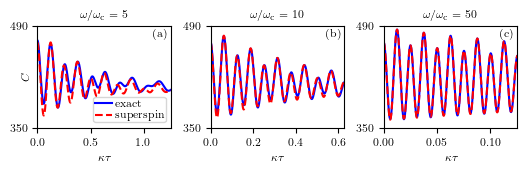

In [4]:
N=10
omega_c = N/2

S_x = qt.jmat(N/2, 'x')
S_y = qt.jmat(N/2, 'y')
S_z = qt.jmat(N/2, 'z')
S_p = qt.jmat(N/2, '+')
S_m = qt.jmat(N/2, '-')
idenJ = qt.qeye(S_z.shape[0])



fig, axs = plt.subplots(1,3, figsize = (1.5*3.54331,0.5*3.54331), layout='tight', width_ratios=[1,1,1])

results = np.zeros(shape=(3,1000))
i = 0
labels = ['(a)', '(b)', '(c)']
for beta in [5,10,50]:
    omega = beta*omega_c
    Jump = S_m
    Ham = omega*S_x
    Liou = qt.liouvillian(Ham, [Jump])
    rho_ss = qt.steadystate(Liou)
    SpSm = (S_p*S_m*rho_ss).tr()
    Sp2Sm2 = (S_p*S_m*S_m*rho_ss*S_p).tr()

    rho_0 = S_m*rho_ss*S_p
    times = np.linspace(0, 5*2*np.pi/omega, 1000)
    dt = 2/10000
    results = qt.mesolve(Ham, rho_0, times, [Jump], [S_p*S_m])
    axs[i].plot(times, results.expect[0], 'b-')
    axs[i].plot(times, corr(times, N, omega), 'r--')
    axs[i].set_title(r'$\omega/\omega_\mathrm{c}= $ '+str(beta), fontsize=8)
    axs[i].set_xlim(0, times[-1])
    axs[i].set_ylim(350, 490)
    axs[i].set_xlabel(r'$\kappa \tau$')
    if i==0:
        axs[i].set_ylabel(r'$C$')
        axs[i].yaxis.set_label_coords(-0.05,0.5)
        axs[i].legend(['exact', 'superspin'], fontsize=8, handlelength=1.5, loc='lower right', handletextpad=0.3, labelspacing=0.2)
    axs[i].text(0.98,0.98, labels[i], fontsize=8, horizontalalignment='right',
                verticalalignment='top', transform=axs[i].transAxes)
    axs[i].set_yticks([350, 490])
    i+=1
fig.savefig('superspin_correlation_approx.pdf', dpi=1000)